In [230]:
# for numerical computing
import numpy as np # type: ignore

# for dataframes
import pandas as pd # type: ignore

# for easier visualization
import seaborn as sns # type: ignore

# for visualization and to display plots
from matplotlib import pyplot as plt # type: ignore
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap # type: ignore

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # type: ignore

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV # type: ignore
from sklearn.model_selection import RandomizedSearchCV # type: ignore

from sklearn.model_selection import cross_val_score # type: ignore

# Machine Learning Models
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.ensemble import RandomForestClassifier # type: ignore
from xgboost import XGBClassifier # type: ignore
from sklearn.tree import DecisionTreeClassifier # type: ignore
from sklearn.svm import SVC # type: ignore
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix # type: ignore

from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.model_selection import cross_val_score # type: ignore
from sklearn.neighbors import KNeighborsClassifier # type: ignore
from matplotlib.colors import ListedColormap # type: ignore
from sklearn.metrics import accuracy_score # type: ignore
#import xgboost
import os
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier # type: ignore
from xgboost import plot_importance  # to plot feature importance # type: ignore

import joblib # type: ignore
sns.set()
plt.style.use('ggplot')
%matplotlib inline




df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\DP\modernDP\data\liver.csv')
df.shape

(583, 11)

In [231]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [232]:
print(df.head())

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Proteins  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1 

In [233]:
df.dtypes[df.dtypes == 'object']

Gender    object
dtype: object

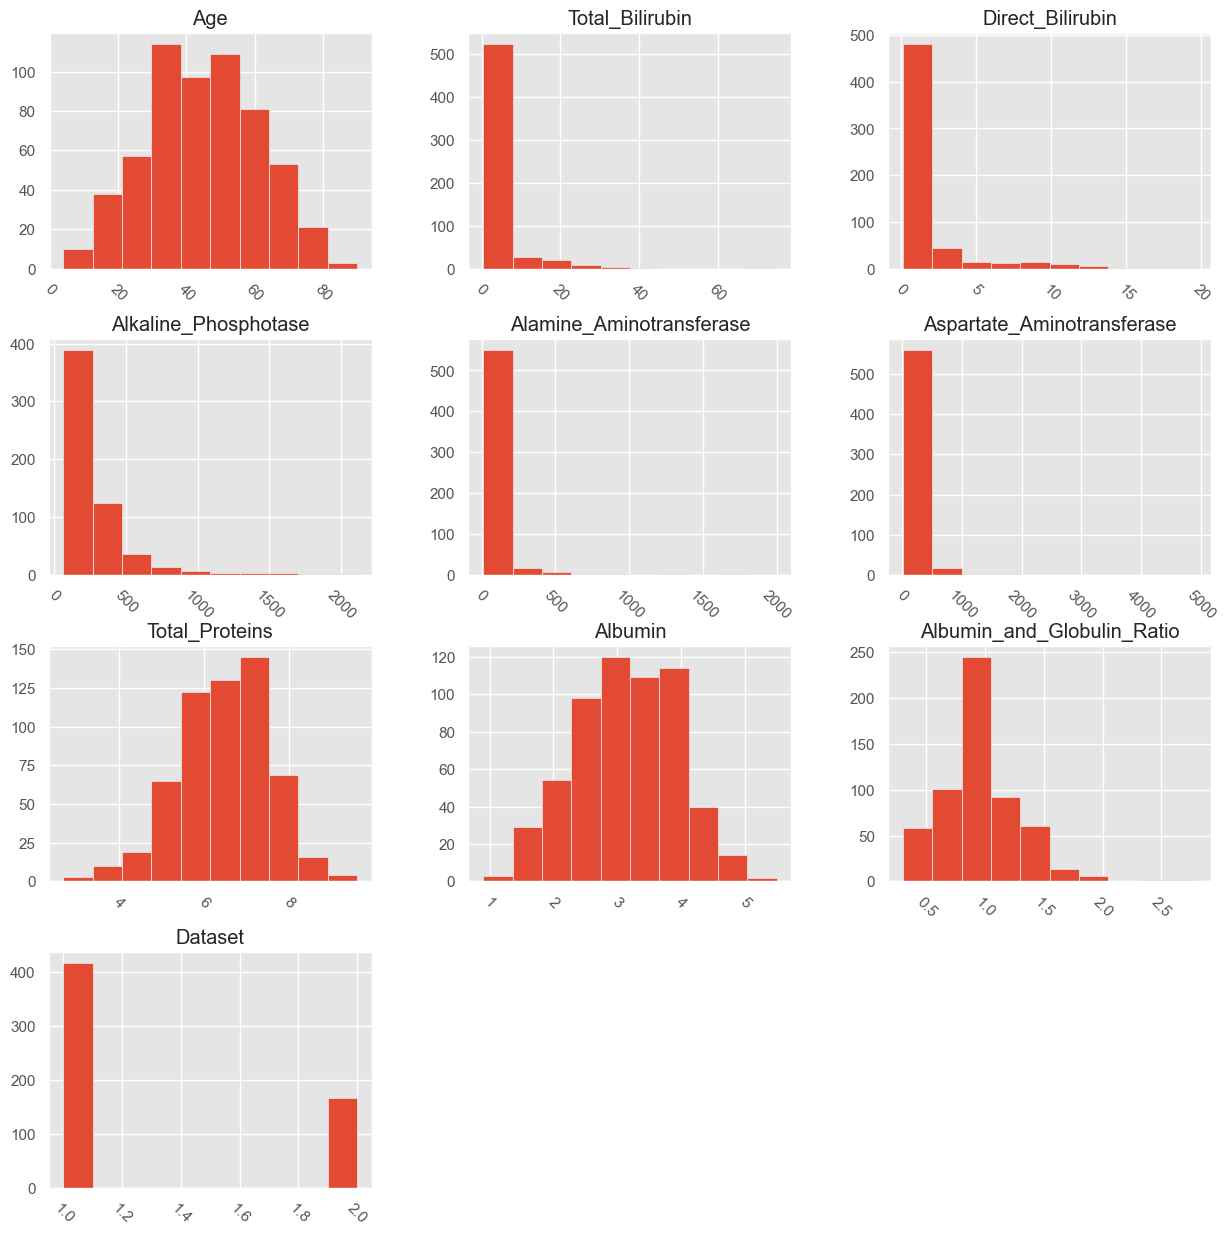

In [234]:
df.hist(figsize=(15,15), xrot=-45, bins=10)
plt.show()

In [235]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [236]:
#if score == negative, mark 0 ; else 1
def partition(x):
    if x== 2:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(partition)

In [237]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


<Axes: xlabel='count', ylabel='Gender'>

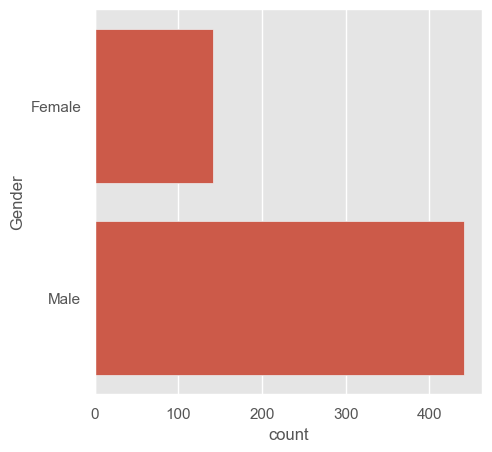

In [238]:
plt.figure(figsize=(5,5))
sns.countplot(y="Gender", data=df)

In [239]:
df[df['Gender'] == 'Male'][['Dataset', 'Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


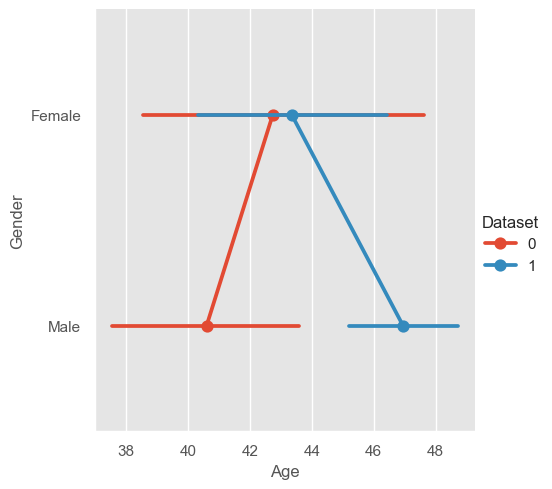

In [240]:
sns.catplot(x="Age", y="Gender", hue="Dataset", data=df, kind="point", markers="o", linestyles="-")

Number of patients that are male:  441
Number of patients that are female:  142


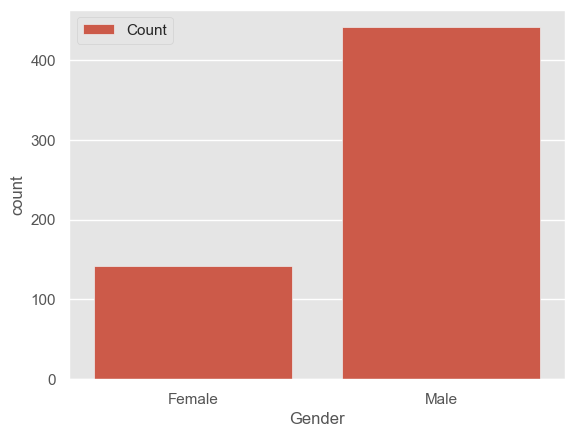

In [241]:
sns.countplot(data=df, x = 'Gender', label='Count')
M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [242]:
#if score == negative, mark 0 ; else 1 
def partition(x):
    if x == 'Male':
        return 0
    return 1
df['Gender'] = df['Gender'].map(partition)

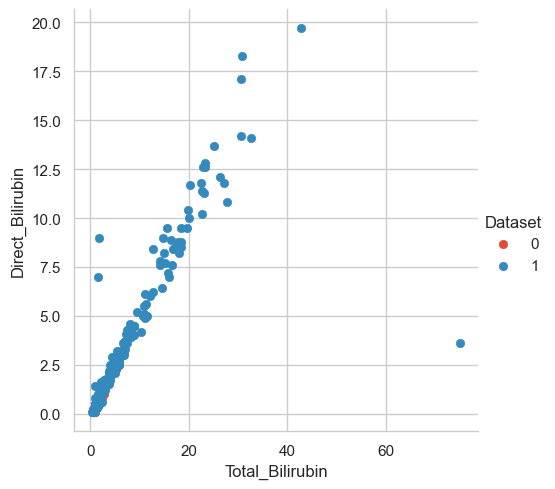

In [243]:
sns.set_style('whitegrid')

g = sns.FacetGrid(df, hue='Dataset', height=5)
g.map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

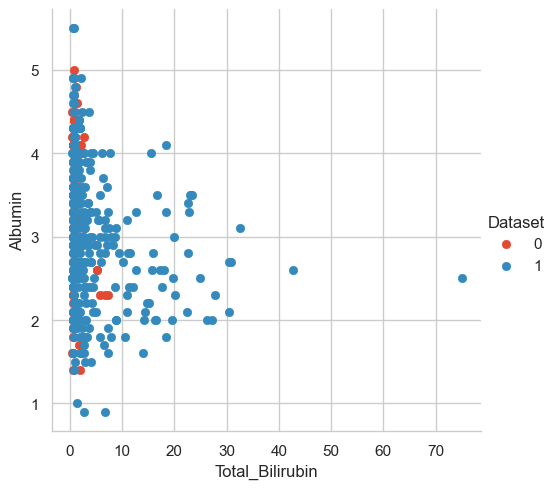

In [244]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Dataset', height=5).map(plt.scatter , 'Total_Bilirubin', 'Albumin').add_legend()

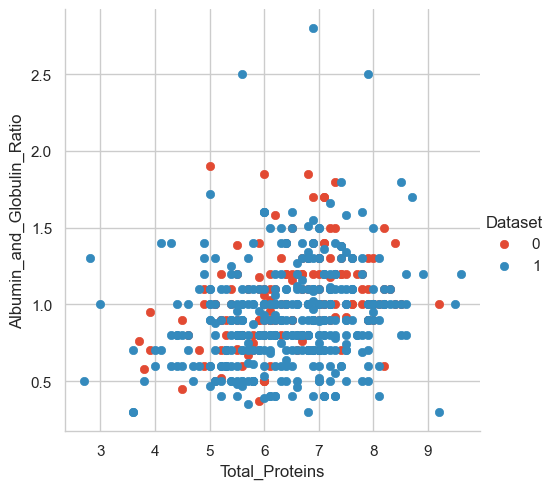

In [245]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Dataset', height=5).map(plt.scatter, 'Total_Proteins', 'Albumin_and_Globulin_Ratio').add_legend()

Correlations
Finally, let's take a look at the relationships between numeric features and other numeric features.
Correlation is a value between -1 and 1 that represents how closely values for two separate features move in unison.
Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
Correlations near -1 or 1 indicate a strong relationship.
Those closer to 0 indicate a weak relationship.
0 indicates no relationship.

In [246]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Proteins,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


<Axes: >

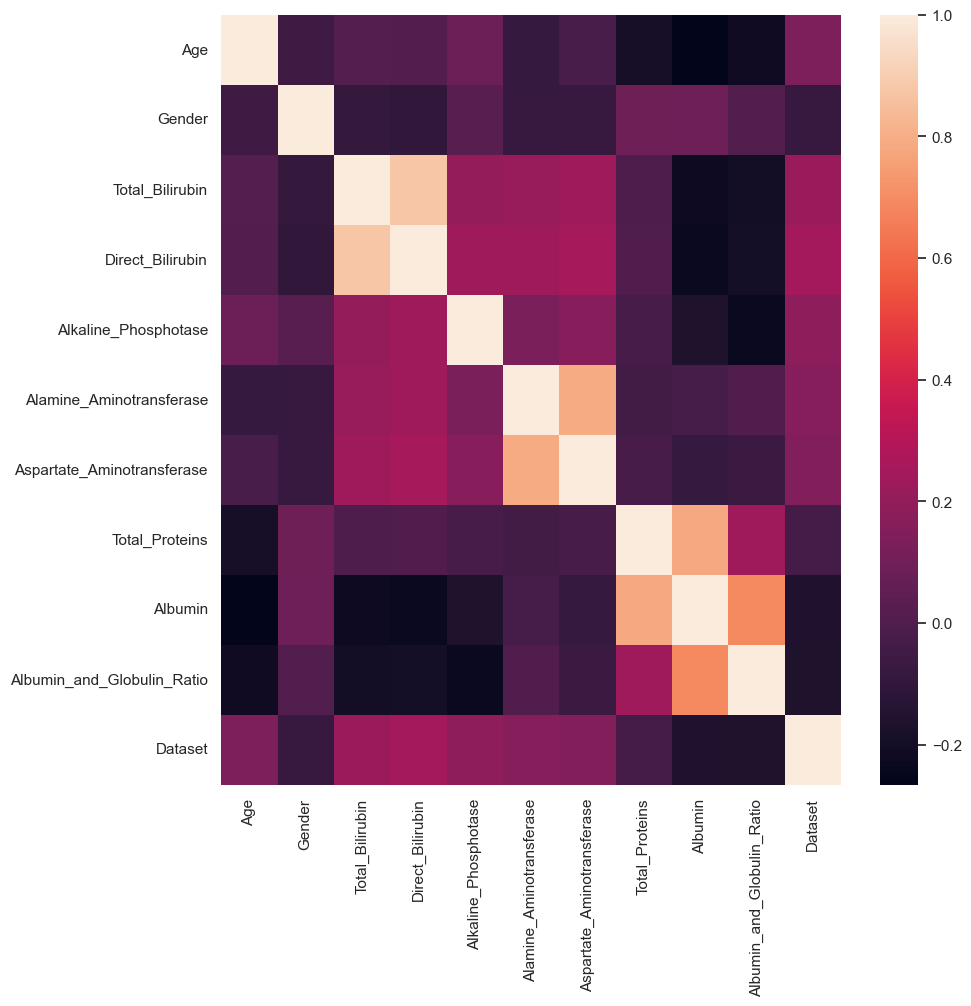

In [247]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

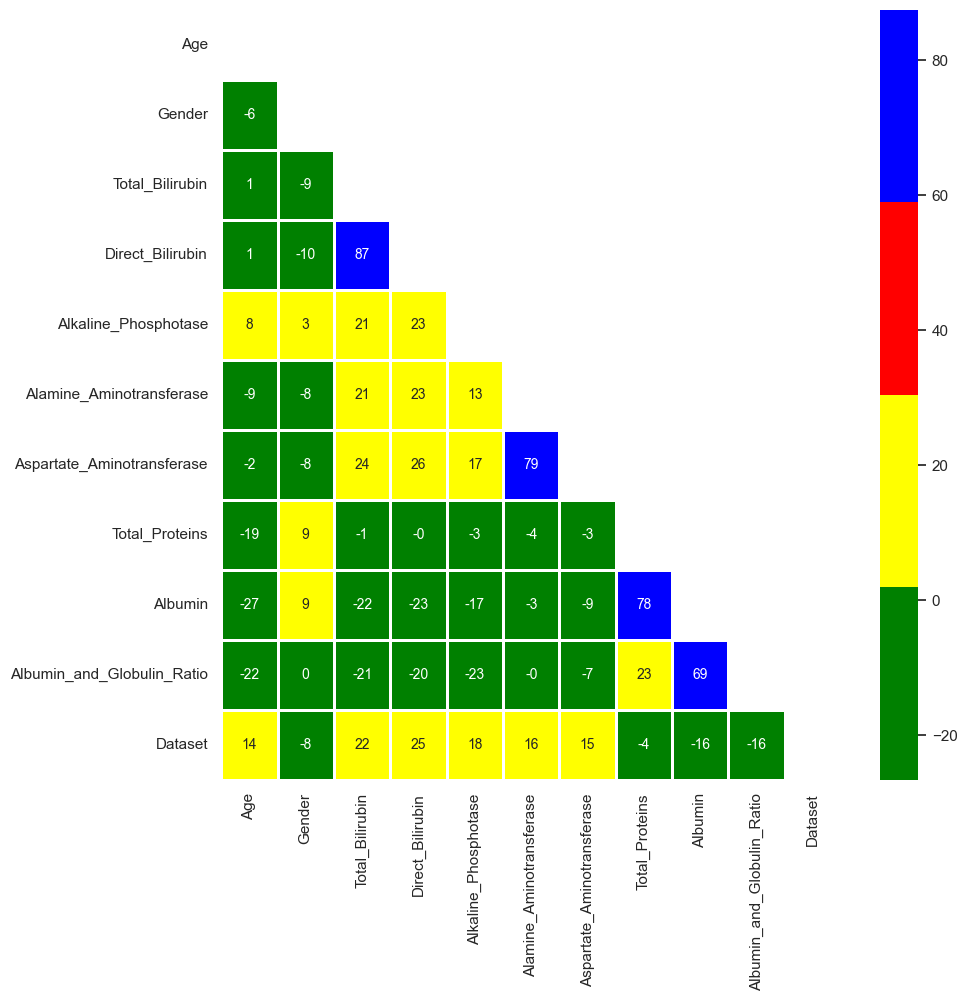

In [248]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr() * 100, mask=mask, fmt = '.0f', annot=True, lw=1 , cmap=ListedColormap(['green', 'yellow', 'red','blue']))

Data Cleaning

In [249]:
df = df.drop_duplicates()
print(df.shape)

(570, 11)


Removing Outliers

<Axes: ylabel='Aspartate_Aminotransferase'>

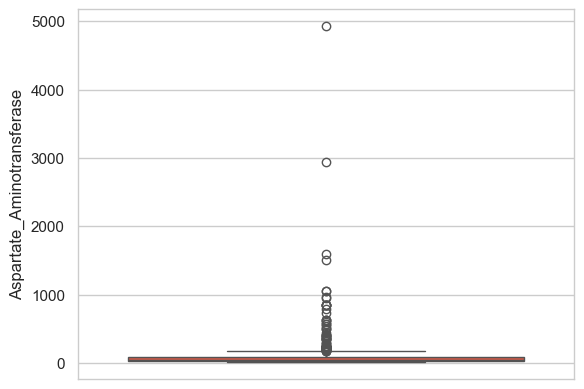

In [250]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [251]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [252]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(569, 11)

<Axes: ylabel='Aspartate_Aminotransferase'>

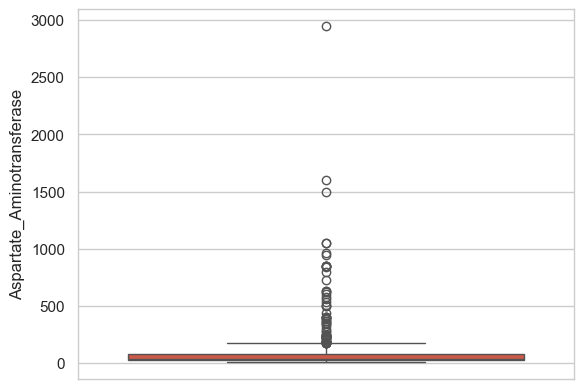

In [253]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [254]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [255]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(568, 11)

In [256]:
df.isnull().values.any()

True

In [257]:
df=df.dropna(how='any')  

In [258]:
df.shape

(564, 11)

In [259]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Machine Learning Models
Data Preparation

In [260]:
y = df.Dataset
X = df.drop('Dataset', axis=1)

In [261]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0,
                                                    stratify=df.Dataset)

In [262]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(394, 10) (170, 10) (394,) (170,)


Data Standardization

In [263]:
categorical_columns = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

X_train = pd.get_dummies(X_train, columns=categorical_columns)

# Create a pipeline with imputation and scaling
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Replace NaN with mean values
    ('scaler', StandardScaler())  # Scale the features
])



In [264]:
# Apply the pipeline to your data
X_train_processed = pipeline.fit_transform(X_train)

Logistic Regression (LR)

In [265]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [266]:
#model prediction
y_pred = lr.predict(X_test)

In [267]:
#accuracy_score
print(accuracy_score(y_train, lr.predict(X_train)))

lr_acc = accuracy_score(y_test , lr.predict(X_test))
print(lr_acc)

0.7258883248730964
0.6588235294117647


In [268]:
#Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[14 35]
 [23 98]]


In [269]:
#classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.29      0.33        49
           1       0.74      0.81      0.77       121

    accuracy                           0.66       170
   macro avg       0.56      0.55      0.55       170
weighted avg       0.63      0.66      0.64       170



KNN

In [270]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [271]:
#_del prediction
y_pred = knn.predict(X_test)

In [272]:
#accuracy score 
print(accuracy_score(y_train, knn.predict(X_train)))

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.751269035532995
0.6941176470588235


In [273]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.35      0.40        49
           1       0.76      0.83      0.80       121

    accuracy                           0.69       170
   macro avg       0.61      0.59      0.60       170
weighted avg       0.67      0.69      0.68       170



SV_

In [274]:
svc = SVC(probability=True)
parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [275]:
grid_search.best_params_

{'C': 0.5, 'gamma': 0.01}

In [276]:
grid_search.best_score_

0.7183057448880235

In [277]:
svc = SVC(C = 0.01, gamma=0.0001, probability=True)
svc.fit(X_train, y_train)

SVC(C=0.01, gamma=0.0001, probability=True)

In [278]:
#_odel prediction
Y_pred = svc.predict(X_test)

In [279]:
#accuracy score 
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(svc_acc)

0.7131979695431472
0.711764705882353


In [280]:
#confusion _atrix
print(confusion_matrix(y_test,y_pred))

[[ 17  32]
 [ 20 101]]


In [281]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.35      0.40        49
           1       0.76      0.83      0.80       121

    accuracy                           0.69       170
   macro avg       0.61      0.59      0.60       170
weighted avg       0.67      0.69      0.68       170



DT

In [282]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

#accuracy_score , confusion _atrix and classification report of decision tree
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.611764705882353 

Confusion Matrix :- 
[[21 28]
 [38 83]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.36      0.43      0.39        49
           1       0.75      0.69      0.72       121

    accuracy                           0.61       170
   macro avg       0.55      0.56      0.55       170
weighted avg       0.63      0.61      0.62       170



In [283]:
#hyper para_eter tuning of decision tree
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 24, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 24 folds for each of 1200 candidates, totalling 28800 fits


GridSearchCV(cv=24, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [284]:
# best parameters and best score
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 7, 'splitter': 'best'}
0.7382046568627452


In [285]:
#best esti_ator
dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.7258883248730964
Test Accuracy of Decision Tree Classifier is 0.6647058823529411 

Confusion Matrix :- 
[[33 16]
 [41 80]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.45      0.67      0.54        49
           1       0.83      0.66      0.74       121

    accuracy                           0.66       170
   macro avg       0.64      0.67      0.64       170
weighted avg       0.72      0.66      0.68       170



RF

In [286]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 16, max_features = 'sqrt', min_samples_leaf = 4, min_samples_split = 2, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_leaf=4,
                       n_estimators=130)

In [287]:
y_pred = rand_clf.predict(X_test)

In [288]:
#accuracy score 
print(accuracy_score(y_train, rand_clf.predict(X_train)))
ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9416243654822335
0.6823529411764706


In [289]:
#confusion matrix
print(confusion_matrix(y_test,y_pred))

[[17 32]
 [22 99]]


In [290]:
#classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.35      0.39        49
           1       0.76      0.82      0.79       121

    accuracy                           0.68       170
   macro avg       0.60      0.58      0.59       170
weighted avg       0.66      0.68      0.67       170



Gradient Boosting Classifier

In [291]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 20, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 20 folds for each of 32 candidates, totalling 640 fits


GridSearchCV(cv=20, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [292]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

In [293]:
grid_search_gbc.best_score_

0.7307894736842104

In [294]:
gbc = GradientBoostingClassifier(learning_rate=0.1 , loss= 'exponential', n_estimators=100)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential')

In [295]:
y_pred = gbc.predict(X_test)

In [296]:
#accuracy_score 
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, y_pred)
print(gbc_acc)

0.9365482233502538
0.7


In [297]:
#confusion__atrix 
print(confusion_matrix(y_test, y_pred))

[[21 28]
 [23 98]]


In [298]:
#classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.43      0.45        49
           1       0.78      0.81      0.79       121

    accuracy                           0.70       170
   macro avg       0.63      0.62      0.62       170
weighted avg       0.69      0.70      0.69       170



XGBoost

In [299]:
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 100, n_estimators = 300)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [300]:
y_pred = xgb.predict(X_test)

In [301]:
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, y_pred)
print(xgb_acc)

0.9923857868020305
0.6882352941176471


In [302]:
#confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[ 16  33]
 [ 20 101]]


In [303]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.33      0.38        49
           1       0.75      0.83      0.79       121

    accuracy                           0.69       170
   macro avg       0.60      0.58      0.58       170
weighted avg       0.66      0.69      0.67       170



Model Comparison

In [304]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(lr_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dtc_acc,4), 100*round(ran_clf_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVM,71.18
5,Gradient Boosting Classifier,70.00
1,KNN,69.41
6,XgBoost,68.82
4,Random Forest Classifier,68.24
3,Decision Tree Classifier,66.47
0,Logistic Regression,65.88


In [305]:
import pickle
model = svc
pickle.dump(model ,open(f"C:\Users\user\OneDrive\Desktop\DP\modernDP\models\liver.pkl", 'wb'))

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3431259597.py, line 3)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\user\\OneDrive\\Desktop\\DP\\modernDP\\notebooks\\outputs\\roc_liver.jpeg'

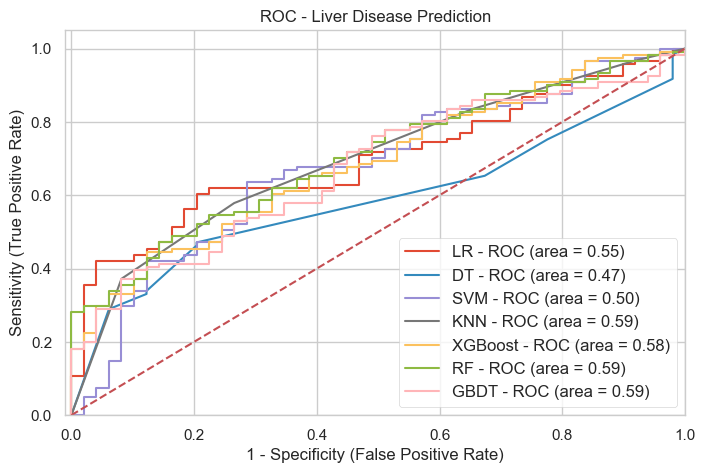

In [ ]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Liver Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("outputs/roc_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()